# Tutorial 1
첫번째로 수행해볼 tutorial은 Random Forest에서 각 모델에 다양성 확보를 위한 장치 중 하나인 Randomly chosen predictor variables를 수행하는데 있어, 최적의 개수는 몇 개인지 실험해봅니다. Randomly chosen predictor variables는 각 트리에서 분할 지점에 무작위로 샘플링되는 feature의 수를 의미합니다. 논문에서 제시한 최적의 개수는 $sqrt(D)$개 라고 언급했는데, 여러 데이터셋을 통해 변수개수를 달리해보면서 확인해보도록 하겠습니다.

In [1]:
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, load_wine, load_digits
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

첫번째 tutorial에서는 sklearn 패키지에서 제공하는 iris, wine, digit 3개의 데이터 셋으로 수행해보겠습니다.

In [2]:
# iris data
iris_dataset = load_iris()
wine_dataset = load_wine()
digits_dataset = load_digits()

## data 1: Iris Dataset
가장 먼저 제일 간단한 iris dataset을 가지고 'Randomly chosen predictor variable'를 수행해보도록 하겠습니다. Iris dataset의 경우 변수가 4개이기 때문에, 논문에서 제시한 것에 의하면 2개가 적당할 것입니다.  
RandomForest의 구성은 sklearn에 있는 함수를 사용하였고, 함수의 인자 중 `max_features`가 트리의 분할 지점에서 무작위로 샘플링되는 feature의 수를 지정하는 인자입니다. 이때 사용자가 별도로 설정하지 않을 경우, $sqrt(D)$개가 default 값으로 입력됩니다.  
다만, 다른 인자의 경우에는 default 값으로 동일하게 설정하여 분기 feature 탐색을 수행해보며, 5-fold를 통해 교차로 검증된 실험 결과를 box plot으로 시각화하여 비교해보는 것이 목적입니다.

In [3]:
models = {}
acc = []

for i in range(1, len(iris_dataset.data[0])+1):
    models[i] = RandomForestClassifier(max_features=i, random_state=2022, n_jobs=-1)
    m_acc = cross_val_score(models[i], iris_dataset.data, iris_dataset.target)
    acc.append(m_acc)
    
print(acc)

[array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ]), array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ]), array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ]), array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])]


실험 결과, `max_features`에 따라 성능이 크게 변하고 있지는 않습니다. 다만, 3개일 경우에는 교차 검증에 따라 성능 결과의 편차가 조금 있는 것으로 나타나고 있습니다. 또한, 1~2개일 경우가 3~4개인 경우보다 편차가 적고 평균 성능이 조금은 더 잘 나오고 있음을 확인할 수 있었습니다.  
해당 iris 데이터셋의 경우 변수의 개수가 4개 밖에 안되기 때문에, 더 많은 변수를 가진 데이터셋으로 실험을 이어가도록 하겠습니다.

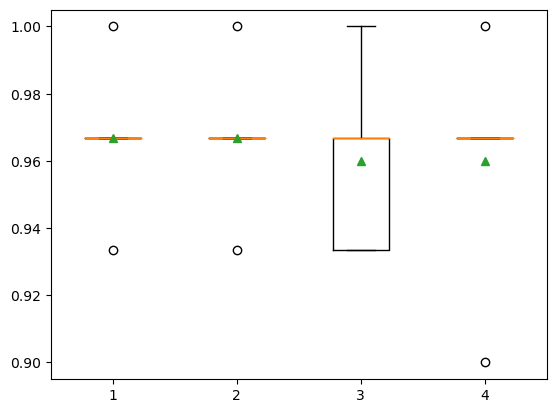

In [4]:
plt.boxplot(acc, showmeans=True)
plt.show()

## data 2: Wine Dataset
두번째는 wine dataset을 가지고 'Randomly chosen predictor variable'를 수행해보도록 하겠습니다. Wine 데이터셋의 경우 변수가 13개이고, target 값은 변수들에 따른 와인의 생산지를 의미하고 3개의 class로 구분됩니다.  
실험 세팅은 iris dataset의 경우와 동일하게 수행합니다.

In [5]:
models = {}
acc = []

for i in range(1, len(wine_dataset.data[0])+1):
    models[str(i)] = RandomForestClassifier(max_features=i, random_state=2022, n_jobs=-1)
    m_acc = cross_val_score(models[str(i)], wine_dataset.data, wine_dataset.target)
    acc.append(m_acc)
    
print(acc)

[array([1.        , 0.94444444, 1.        , 1.        , 0.97142857]), array([1.        , 0.94444444, 1.        , 1.        , 1.        ]), array([0.91666667, 0.94444444, 0.94444444, 0.97142857, 1.        ]), array([0.97222222, 0.94444444, 0.94444444, 0.97142857, 1.        ]), array([0.94444444, 0.94444444, 0.97222222, 0.97142857, 1.        ]), array([0.94444444, 0.94444444, 0.94444444, 0.97142857, 1.        ]), array([0.94444444, 0.94444444, 0.94444444, 0.97142857, 1.        ]), array([0.94444444, 0.94444444, 1.        , 0.97142857, 1.        ]), array([0.94444444, 0.94444444, 0.97222222, 0.97142857, 1.        ]), array([0.94444444, 0.94444444, 0.94444444, 0.97142857, 1.        ]), array([0.91666667, 0.94444444, 0.97222222, 0.97142857, 1.        ]), array([0.94444444, 0.88888889, 0.97222222, 0.97142857, 1.        ]), array([0.91666667, 0.94444444, 0.97222222, 0.97142857, 1.        ])]


실험 결과, `max_features`에 따라 성능이 크게 변하고 있지는 않지만, 개수마다 조금의 차이는 있는 것으로 보입니다. 논문에서 제시한대로라면 3~4개의 변수가 적당할 것이지만, 실험 결과에서는 변수의 개수를 2개로 설정한 경우가 가장 좋은 모습입니다. 특히 3개로 설정한 경우에는 성능의 편차가 조금 있으면서 평균 성능도 다른 개수일 때보다 조금 떨어지고 있습니다.  

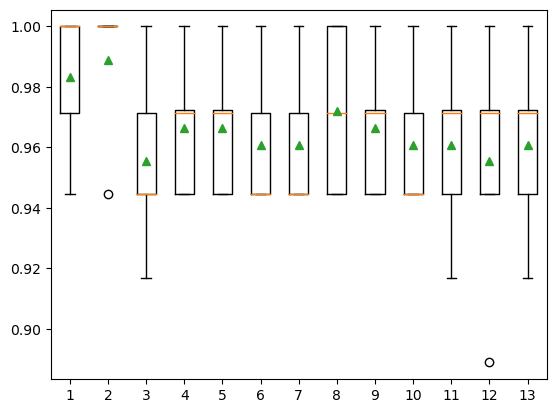

In [6]:
plt.boxplot(acc, showmeans=True)
plt.show()

## data 3: Digit Dataset
세번째는 digit dataset을 가지고 'Randomly chosen predictor variable'를 수행해보도록 하겠습니다. Digit 데이터셋은 0~9까지의 손글씨 데이터셋이고, 8x8 이미지 데이터이기 때문에 64개의 변수를 가지고 있습니다.  
실험 세팅은 앞선 실험과 동일하게 수행합니다.

In [7]:
models = {}
acc = []

for i in range(1, len(digits_dataset.data[0])+1):
    models[str(i)] = RandomForestClassifier(max_features=i, random_state=42, n_jobs=-1)
    m_acc = cross_val_score(models[str(i)], digits_dataset.data, digits_dataset.target)
    acc.append(m_acc)
    
print(acc)

[array([0.92777778, 0.93333333, 0.95543175, 0.98050139, 0.91643454]), array([0.93333333, 0.9       , 0.94986072, 0.97214485, 0.91922006]), array([0.93888889, 0.9       , 0.95543175, 0.96935933, 0.92200557]), array([0.94166667, 0.91388889, 0.9637883 , 0.96935933, 0.91922006]), array([0.93333333, 0.91388889, 0.95821727, 0.96657382, 0.93593315]), array([0.93333333, 0.91944444, 0.95543175, 0.97493036, 0.93036212]), array([0.92222222, 0.91111111, 0.95543175, 0.96100279, 0.93593315]), array([0.93055556, 0.91111111, 0.95821727, 0.96935933, 0.9275766 ]), array([0.92222222, 0.925     , 0.95821727, 0.9637883 , 0.91922006]), array([0.93888889, 0.91944444, 0.95821727, 0.95543175, 0.92479109]), array([0.93055556, 0.90555556, 0.96100279, 0.95543175, 0.92200557]), array([0.925     , 0.91111111, 0.95543175, 0.95821727, 0.91922006]), array([0.93611111, 0.90833333, 0.96657382, 0.9637883 , 0.91643454]), array([0.93611111, 0.92222222, 0.9637883 , 0.96935933, 0.91364903]), array([0.93333333, 0.90555556, 0.

실험 결과, 변수의 개수가 많은만큼 개수에 따라서 다양한 차이를 보여주고 있습니다. 대체적으로 `max_features`의 개수를 많이 사용할수록 점점 앙상블의 성능이 조금씩 하락하고 있습니다. 또한, 논문에서 제시한대로 8개가 최적인지를 확인해본 결과, 반드시 해당 개수에서만 월등한 성능을 보여주고 있지는 않습니다. 다만, 변수의 개수를 적게 사용할수록 많이 사용할 때(32개 이상)보다 성능을 조금 더 좋은 모습을 보여주고 있기 때문에 절반 이하의 개수를 사용해 분기를 하는 것이 좋아보이고, 절반 이하의 개수를 사용할 때 평균 성능에 큰 차이가 없기 때문에 default 값을 사용해도 무방할 것으로 사료됩니다.

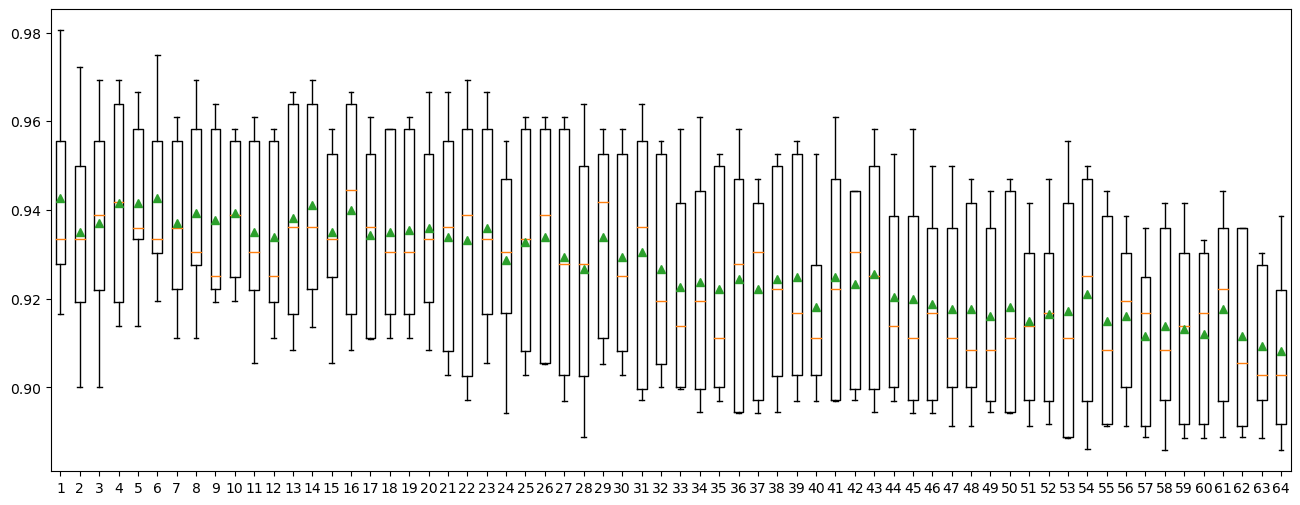

In [8]:
plt.figure(figsize=(16,6))
plt.boxplot(acc, showmeans=True)
plt.show()

---

# Tutorial 2
두번째로 수행해볼 tutorial은 topic2에서 배웠던 SVM을 bagging을 사용해 앙상블 했을 때, 단일 SVM을 사용한 경우보다 성능이 얼마나 향상되는지 파악해보고자 합니다. Bagging은 모델의 variance가 높고 bias가 낮은 경우 효과를 볼 수 있는 앙상블 기법입니다. 따라서, 먼저 k-fold 교차검증을 통해 모델이 보여주는 성능을 먼저 확인하고, 앙상블을 수행하도록 하겠습니다. 데이터셋은 sklearn에서 제공하는 wine 데이터셋을 사용해 실험해보았습니다.

In [23]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_wine

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

데이터셋을 불러오고, SVM은 kernel을 사용하지 않은 LinearSVM을 불러왔습니다.

In [13]:
wine_dataset = load_wine()

runner = LinearSVC()

5-fold로 앙상블을 하지 않은 경우 LinearSVM의 성능을 비교해본 결과, 데이터에 따른 성능의 변화가 크게 나타나고 있습니다. 이는 variance가 높다고 할 수 있습니다. 이에 bagging 기법을 활용하여 앙상블을 시도해 모델의 성능 변화를 살펴보도록 하겠습니다.

Linear SVM Result by 5-fold:  [0.61111111 0.63888889 0.86111111 0.85714286 0.97142857]


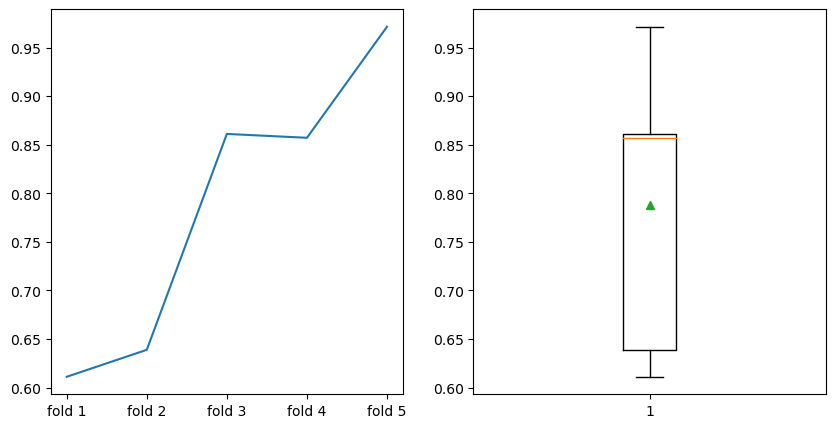

In [95]:
svm_kfold_acc = cross_val_score(runner, wine_dataset.data, wine_dataset.target)
print('Linear SVM Result by 5-fold: ', svm_kfold_acc)

fold = ['fold 1', 'fold 2', 'fold 3', 'fold 4', 'fold 5']
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fold, svm_kfold_acc)
plt.subplot(1, 2, 2)
plt.boxplot(svm_kfold_acc, showmeans=True)
plt.show()

앙상블을 위해 base runner인 LinearSVM을 10개로 쌓아 결과를 결합하였습니다.

In [ ]:
base_runner = LinearSVC()
bagging_model = BaggingClassifier(base_estimator=base_runner,
                                  n_estimators=10,
                                  random_state=2022,
                                  n_jobs=-1)

bagging_acc = cross_val_score(bagging_model, wine_dataset.data, wine_dataset.target)

bagging을 통한 앙상블 결과, 모델의 성능이 대체적으로 향상되었을 뿐만 아니라 variance의 변화도 줄어든 것을 확인할 수 있었습니다. 2번째 tutorial은 topic2에서 배운 알고리즘과 이번 topic4에서 배운 알고리즘을 결합하였을 때의 성능 향상을 확인하고자 한 간단한 tutorial이었습니다.

Results of Bagging with SVM:  [0.75       0.80555556 0.94444444 0.91428571 0.97142857]


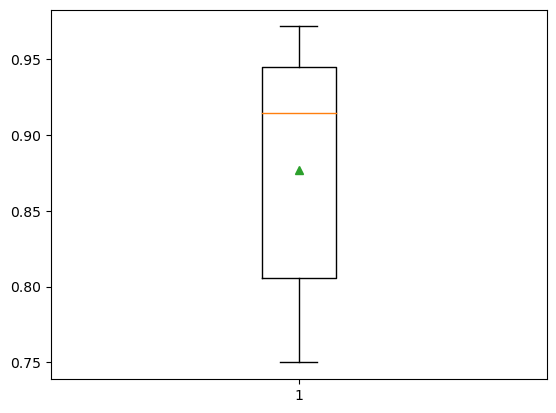

In [94]:
print('Results of Bagging with SVM: ', bagging_acc)

plt.boxplot(bagging_acc, showmeans=True)
plt.show()

---

# Tutorial 3
마지막으로 수행해볼 tutorial은 Boosting 기법 중 Gradient Boosting Machine의 loss function을 달리해보면서 성능을 비교해보고자 합니다. Loss function으로는 Squared loss, Absolute loss, Huber loss, Quantile loss를 사용해보며 성능을 비교해봅니다. 이번 tutorial의 데이터셋은 분류가 아닌 회귀 task의 데이터셋인 boston, breast_cancer 을 사용합니다. 2개의 데이터셋도 앞선 tutorial과 동일하게 sklearn에서 제공하고 있습니다. Base runner로는 모두 decision tree를 사용합니다.

In [50]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston, load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV

import time
import warnings

warnings.filterwarnings('ignore')

회귀문제를 위해 boston dataset과 breast_cancer dataset을 불러오고, 학습 및 평가를 위해 7:3으로 데이터를 분할하였습니다.

In [65]:
boston_data = load_boston()
bre_data = load_breast_cancer()

bos_X_train, bos_X_test, bos_y_train, bos_y_test = train_test_split(boston_data.data, boston_data.target, test_size=0.3, shuffle=True, random_state=2022)
bre_X_train, bre_X_test, bre_y_train, bre_y_test = train_test_split(bre_data.data, bre_data.target, test_size=0.3, shuffle=True, random_state=2022)
during_time = []

먼저, boston dataset에 대한 loss fucntion 변화에 따른 예측 MSE 비교입니다. 이를 위해 다른 설정값은 고정하고 loss function에 따른 `learning_rate`만 최적의 하이퍼 파라미터를 탐색한 뒤, 찾아진 모델로 변화를 살펴보았습니다.  
boston dataset의 경우 loss fucntion 변화에 따라서 성능이 크게 변화하고 있지는 않았습니다. 다만, quantile function을 사용한 경우에는 다른 function 사용에 비해 예측이 loss가 큰 것을 확인할 수 있었습니다.

In [103]:
loss_list = ['squared_error', 'absolute_error', 'huber', 'quantile']

models = {}
bos_mse = []

params = {
    #'n_estimators': [10, 50, 100, 200, 400],
    'learning_rate': [0.001, 0.01, 0.1]
    }

for los in loss_list:
    gbm_reg = GradientBoostingRegressor(loss=los, n_estimators=50, random_state=2022)
    models[los] = GridSearchCV(gbm_reg, param_grid=params, n_jobs=-1)
    models[los].fit(bos_X_train, bos_y_train)
    
    pred = models[los].predict(bos_X_test)
    bos_mse.append(mean_squared_error(pred, bos_y_test))

print('Results of MSE differencing Loss fucntion: ', bos_mse)

Results of MSE differencing Loss fucntion:  [12.953580463086885, 15.558519166647855, 14.357050320024488, 57.85764736858157]


다음으로 breast_cancer dataset에 대한 loss fucntion 변화에 따른 예측 MSE 비교입니다. 실험의 세팅은 위의 경우와 동일하게 하였습니다.  
loss fucntion 변화에 따라서 성능이 크게 변화하고 있지는 않았습니다. 다만, L1 loss와 huber loss를 사용한 경우 다른 2개의 loss를 사용한 경우보다 mse 값이 상대적으로 컸음을 확인할 수 있습니다.

In [104]:
loss_list = ['squared_error', 'absolute_error', 'huber', 'quantile']

models = {}
bre_mse = []


params = {
    'learning_rate': [0.001, 0.01, 0.1]
    }

for los in loss_list:
    gbm_reg = GradientBoostingRegressor(loss=los, n_estimators=50, random_state=2022)
    models[los] = GridSearchCV(gbm_reg, param_grid=params, n_jobs=-1)
    models[los].fit(bre_X_train, bre_y_train)
    
    pred = models[los].predict(bre_X_test)
    bre_mse.append(mean_squared_error(pred, bre_y_test))

print('Results of MSE differencing Loss fucntion: ', bre_mse)

Results of MSE differencing Loss fucntion:  [0.04182488700085189, 0.39766081871345027, 0.049810807839089706, 0.39766081871345027]


시각적으로 loss 변화에 따라서 MSE를 비교해보았습니다. 해당 함수에서 제안하는 default값인 L2 loss를 사용하는 것이 가장 적절할 것으로 판단됩니다. 물론, 어느 loss function을 사용할 것인지는 dataset의 특성에 따라서 분석 목적에 따라서 분석자가 정해야할 것입니다. 

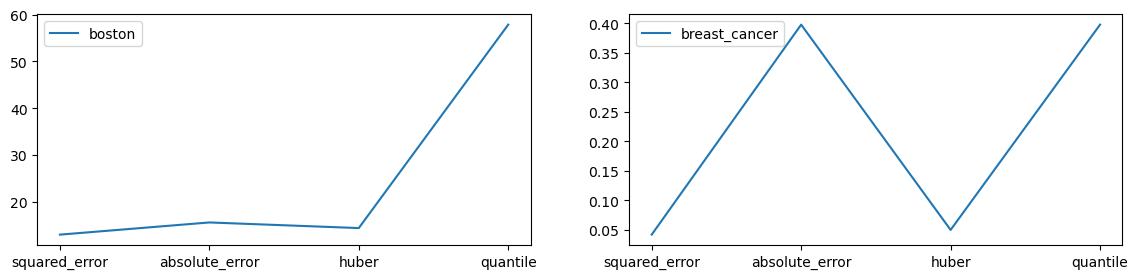

In [105]:
plt.figure(figsize=(14, 3))
plt.subplot(1, 2, 1)
plt.plot(loss_list, bos_mse, label='boston')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(loss_list, bre_mse, label='breast_cancer')
plt.legend()
plt.show()